In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
dir_data='./data/'
f_app=os.path.join(dir_data,'application_train.csv')
app_train=pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


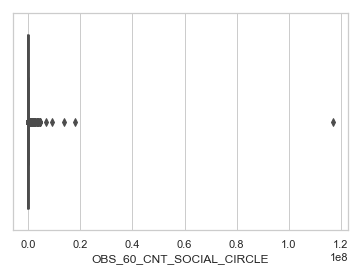

In [176]:
#app_train['AMT_INCOME_TOTAL']#float64 --outlier
#app_train['REGION_POPULATION_RELATIVE']#float64 --outlier
#app_train['OBS_60_CNT_SOCIAL_CIRCLE']#float64 --outlier

#app_train.values
#pd.isnull(app_train)
#plt.hist(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])
#plt.show()

import seaborn as sns
sns.set(style='whitegrid')

sns.boxplot(app_train['AMT_INCOME_TOTAL'])
sns.boxplot(app_train['REGION_POPULATION_RELATIVE'])
sns.boxplot(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])



In [86]:
import seaborn as sns
sns.set(style='whitegrid')

dtype_select=[]

numeric_columns=list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

numeric_columns=list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())))])

type(numeric_columns)

print('Numbers of remain columns %s' % len(numeric_columns))

for col in numeric_columns:
    sns.boxplot(app_train[col])
    plt.show()

Numbers of remain columns 0


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


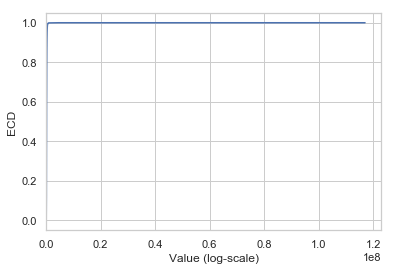

In [175]:
print(app_train['AMT_INCOME_TOTAL'].describe())

cdf=app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(),cdf.index.max()*1.05])
plt.ylim([-0.05,1.05])
plt.show


plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECD')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()


0         0.018801
1         0.003541
2         0.010032
3         0.008019
4         0.028663
5         0.035792
6         0.035792
7         0.003122
8         0.018634
9         0.019689
10        0.022800
11        0.015221
12        0.031329
13        0.016612
14        0.010006
15        0.020713
16        0.018634
17        0.010966
18        0.046220
19        0.015221
20        0.015221
21        0.025164
22        0.020713
23        0.006296
24        0.026392
25        0.028663
26        0.018029
27        0.019101
28        0.046220
29        0.030755
            ...   
307481    0.008575
307482    0.031329
307483    0.007330
307484    0.032561
307485    0.003813
307486    0.072508
307487    0.010147
307488    0.004960
307489    0.014464
307490    0.010147
307491    0.019101
307492    0.028663
307493    0.019689
307494    0.035792
307495    0.025164
307496    0.004960
307497    0.007020
307498    0.072508
307499    0.007020
307500    0.031329
307501    0.009175
307502    0.

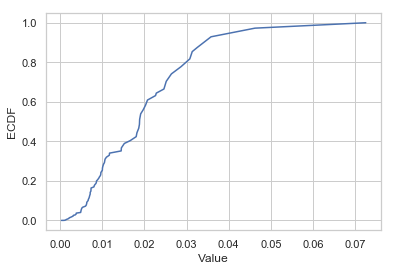

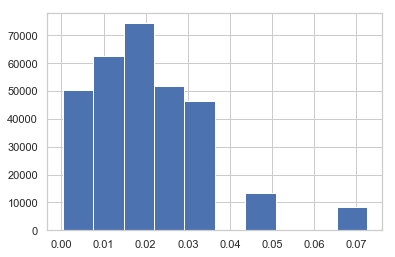

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [181]:
print(app_train['REGION_POPULATION_RELATIVE'])

cdf=app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05])
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

0          2.0
1          1.0
2          0.0
3          2.0
4          0.0
5          0.0
6          1.0
7          2.0
8          1.0
9          2.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         4.0
18         8.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         1.0
25         0.0
26        10.0
27         2.0
28         0.0
29         0.0
          ... 
307481     0.0
307482     0.0
307483     1.0
307484     0.0
307485     0.0
307486     0.0
307487     0.0
307488     1.0
307489     1.0
307490     0.0
307491     4.0
307492     0.0
307493     0.0
307494    11.0
307495     0.0
307496     0.0
307497     0.0
307498     0.0
307499     4.0
307500     0.0
307501     2.0
307502     0.0
307503     9.0
307504     0.0
307505     0.0
307506     0.0
307507     0.0
307508     6.0
307509     0.0
307510     0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64


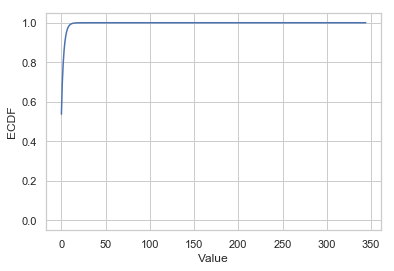

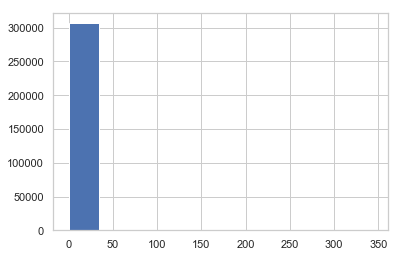

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [182]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])

cdf=app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05])
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

In [190]:
loc_a = app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20]
loc_b =app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
                 
app_train.loc[loc_a,loc_b].hist()
plt.show()

KeyError: "None of [Index([                                                                                ('S', 'K', '_', 'I', 'D', '_', 'C', 'U', 'R', 'R'),\n                                                                                                           ('T', 'A', 'R', 'G', 'E', 'T'),\n                                               ('N', 'A', 'M', 'E', '_', 'C', 'O', 'N', 'T', 'R', 'A', 'C', 'T', '_', 'T', 'Y', 'P', 'E'),\n                                                                                  ('C', 'O', 'D', 'E', '_', 'G', 'E', 'N', 'D', 'E', 'R'),\n                                                                             ('F', 'L', 'A', 'G', '_', 'O', 'W', 'N', '_', 'C', 'A', 'R'),\n                                                              ('F', 'L', 'A', 'G', '_', 'O', 'W', 'N', '_', 'R', 'E', 'A', 'L', 'T', 'Y'),\n                                                                             ('C', 'N', 'T', '_', 'C', 'H', 'I', 'L', 'D', 'R', 'E', 'N'),\n                                                         ('A', 'M', 'T', '_', 'I', 'N', 'C', 'O', 'M', 'E', '_', 'T', 'O', 'T', 'A', 'L'),\n                                                                                       ('A', 'M', 'T', '_', 'C', 'R', 'E', 'D', 'I', 'T'),\n                                                                                  ('A', 'M', 'T', '_', 'A', 'N', 'N', 'U', 'I', 'T', 'Y'),\n       ...\n                                                         ('F', 'L', 'A', 'G', '_', 'D', 'O', 'C', 'U', 'M', 'E', 'N', 'T', '_', '1', '8'),\n                                                         ('F', 'L', 'A', 'G', '_', 'D', 'O', 'C', 'U', 'M', 'E', 'N', 'T', '_', '1', '9'),\n                                                         ('F', 'L', 'A', 'G', '_', 'D', 'O', 'C', 'U', 'M', 'E', 'N', 'T', '_', '2', '0'),\n                                                         ('F', 'L', 'A', 'G', '_', 'D', 'O', 'C', 'U', 'M', 'E', 'N', 'T', '_', '2', '1'),\n       ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'H', 'O', 'U', 'R'),\n            ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'D', 'A', 'Y'),\n       ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'W', 'E', 'E', 'K'),\n            ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'M', 'O', 'N'),\n            ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'Q', 'R', 'T'),\n       ('A', 'M', 'T', '_', 'R', 'E', 'Q', '_', 'C', 'R', 'E', 'D', 'I', 'T', '_', 'B', 'U', 'R', 'E', 'A', 'U', '_', 'Y', 'E', 'A', 'R')],\n      dtype='object', length=122)] are in the [index]"